# Baseline Models

## 1. Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('..'))

from src.utils.metrics import calculate_metrics

# Set plots style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Processed Data

In [2]:
train_df = pd.read_csv('../data/processed/train_featurized.csv')
test_df = pd.read_csv('../data/processed/test_featurized.csv')

print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

# Separate features and target
X = train_df.drop(['id', 'SMILES', 'Tm'], axis=1)
y = train_df['Tm']

X_test = test_df.drop(['id', 'SMILES'], axis=1)

# Handle any remaining NaNs (simple mean imputation for baselines)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

Train shape: (2662, 2859)
Test shape: (666, 2858)


## 3. Baseline Model Evaluation
Evaluate Linear, Ridge, Lasso, and ElasticNet using 5-Fold Cross-Validation.

In [3]:
results = []

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Create pipeline with scaling
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  # Robust scaler is better for potential outliers
        ('model', model)
    ])
    
    # Cross-validation
    cv_results = cross_validate(
        pipeline, X, y, 
        cv=kf, 
        scoring=['neg_mean_absolute_error', 'r2'],
        return_train_score=True
    )
    
    mae = -cv_results['test_neg_mean_absolute_error'].mean()
    r2 = cv_results['test_r2'].mean()
    print(f"{name}: MAE = {mae:.4f}, R2 = {r2:.4f}")
    
    results.append({
        'Model': name,
        'MAE': mae,
        'R2': r2
    })

results_df = pd.DataFrame(results)
display(results_df)

Linear Regression: MAE = 784.8426, R2 = -497.3705


c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Kata\miniconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.87141e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge: MAE = 40.9861, R2 = 0.4264


c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+06, tolerance: 1.528e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+06, tolerance: 1.528e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+06, toleranc

Lasso: MAE = 30.7913, R2 = 0.5368


c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+06, tolerance: 1.528e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+06, tolerance: 1.528e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+06, toleranc

ElasticNet: MAE = 31.9485, R2 = 0.3323


c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+06, tolerance: 1.535e+03
  model = cd_fast.enet_coordinate_descent(


,Model,MAE,R2
0,Linear Regression,784.842557,-497.370503
1,Ridge,40.986091,0.426391
2,Lasso,30.791256,0.536780
3,ElasticNet,31.948459,0.332339


## 4. Feature Importance (Linear Models)
Examine coefficients from the best performing linear model (likely Ridge or Linear).

Best Model: Lasso


c:\Users\Kata\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+06, tolerance: 1.928e+03
  model = cd_fast.enet_coordinate_descent(


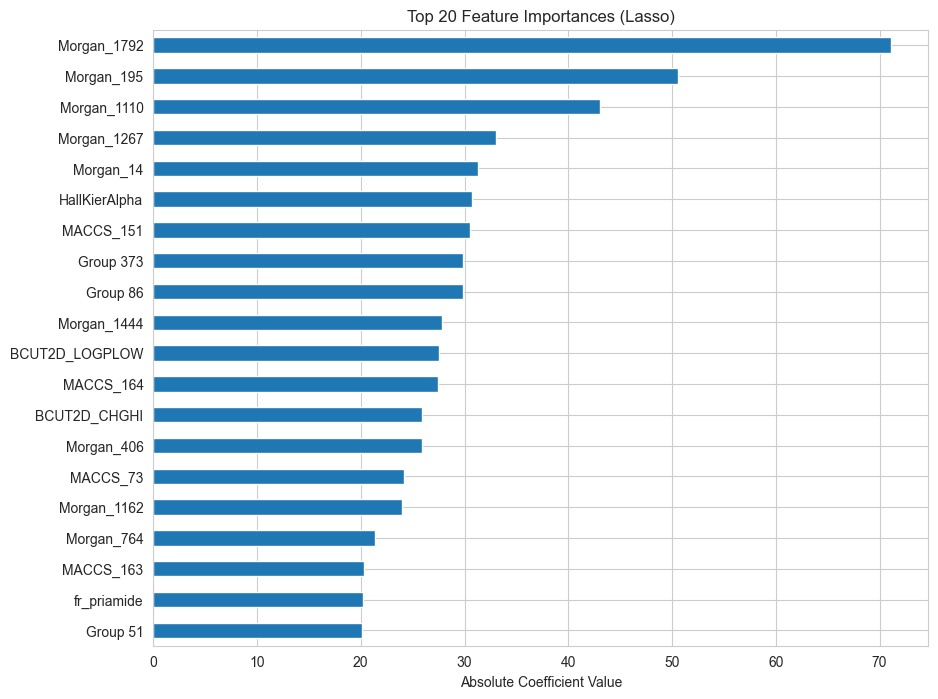

In [4]:
best_model_name = results_df.sort_values('MAE').iloc[0]['Model']
print(f"Best Model: {best_model_name}")

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', models[best_model_name])
])
pipeline.fit(X, y)

if hasattr(models[best_model_name], 'coef_'):
    coefs = pd.Series(
        pipeline.named_steps['model'].coef_,
        index=X.columns
    )
    
    # Plot top 20 coefficients
    plt.figure(figsize=(10, 8))
    coefs.abs().sort_values(ascending=False).head(20).plot(kind='barh')
    plt.title(f'Top 20 Feature Importances ({best_model_name})')
    plt.xlabel('Absolute Coefficient Value')
    plt.gca().invert_yaxis()
    plt.show()

## 5. Generate Submission
Generate a submission file using the best linear model to check leaderboard performance.

In [5]:
test_preds = pipeline.predict(X_test)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Tm': test_preds
})

submission.to_csv('../submissions/baseline_linear.csv', index=False)
print("Saved submission to submissions/baseline_linear.csv")

Saved submission to submissions/baseline_linear.csv
